### 从一个简单的语法结构开始

In [1]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 可爱的 | 小小的
"""

### 如果我们想表达某种句式结构，可以用下面这种方法

In [3]:
import random

def adj():
    #按|这条线把字符串分割,返回成列表,random.choice随机从该列表选择一项
    #后面那个split把文字前后空格去掉,返回列表，切片为0取出字符串
    return random.choice('蓝色的 | 可爱的 | 小小的'.split('|')).split()[0]

def adj_star():
    #lambda代表函数，choice调用里面的函数之一，函数要想输出值须在后面加括号()
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [12]:
adj_star()

'小小的小小的蓝色的小小的'

### 但问题是，如果我们改变了语法，所有的句子又得重写，这就很麻烦？
### 有没有简单一点的方法呢？

思路：我们可以把一个语法模型用字典的形式封装好，根据字典的值键对生成词汇，再把词汇拼接成句子

In [58]:
#把语法模式改成字典
def create_grammar(grammar_str, split = '=>', line_split='\n'):
    #为一个语法模型创建空字典
    grammar = {}
    #对一个已经定义好的语法进行操作，例如host,human
    #先将每一行分开成列表
    for line in grammar_str.split(line_split):
        #如果某一行是空值，则继续前进到下一行
        if not line.strip(): continue
        #按‘=>’这个符号把每一行里面的表达式和内容划分开
        exp, stmt = line.split(split)
        #先把内容根据空格和竖线划分开，把表达式和内容传入字典中
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [47]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""
create_grammar(adj_grammar)

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [51]:
#取出字典的值，形成句子
choice = random.choice
def generate(gram, target):
    #设置递归终止条件，如果目标不在对应的key这列中则直接返回value
    if target not in gram:
        return target
    #注意choice返回的是列表中套着的列表！这个套着的列表可以对每个值递归下去,直到变成字符
    expanded = [generate(gram,t) for t in choice(gram[target])]
    #把expanded列表中的字符串连接起来，后面是排除Null值
    #/n相当于一个换行的条件，如果出现则换行('\n')
    #这个换行是专门针对后面写的programming语句设置的条件
    return ''.join([e if e != '/n' else '\n' for e in expanded if e != 'null' ])

# 上面那个列表生成式的正常写法
# e for e in expanded:
#     if e != 'null':
#         if e != '/n':
#             e
#         else '\n'

In [52]:
example_grammar = create_grammar(simple_grammar)
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['可爱的'], ['小小的']]}

In [53]:
generate(gram=example_grammar,target='sentence')

'这个小猫听着一个可爱的女人'

In [54]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [63]:
for i in range(10):
    print(generate(gram=create_grammar(host, split = '='),target='host'))
for i in range(10):
    print(generate(gram=create_grammar(human, split = '='),target='human'))

你好我是9号,请问你要赌博吗？
你好我是9号,您需要打牌吗？
你好我是6号,您需要赌博吗？
您好我是1号,您需要打牌吗？
小朋友,您好我是7号,请问你要打猎吗？
先生,你好我是3号,您需要打猎吗？
女士,您好我是1号,请问你要打猎吗？
女士,你好我是9863号,您需要赌博吗？
您好我是8号,您需要打牌吗？
女士,您好我是39669号,您需要赌博吗？
我找找玩的
俺想找点玩的
俺想找点乐子
我想找点玩的
俺找找玩的
我想找点乐子
我想找点玩的
俺找找乐子
我想找点玩的
俺想找点玩的


### 当我们可以自由地根据语法结构生成句子以后，又发现了另一个问题
### 有的句子看上去很奇怪，从概率的角度来说，就是出现的次数很少
### 这里我们引入 Language model

$$ language\_model(String) = Probability(String) \in (0, 1) $$
$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 
$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w_2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 
##### How to get $ Pro(w1 | w2 w3 w4) $ ?

In [69]:
import pandas as pd
filename = 'article_9k.txt'
content = pd.read_csv(filename,names='c')
content.head()

,c
0,此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定...
1,骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能...
2,此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可...
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车新华社记者张立云摄
4,原标题44岁女子跑深圳约会网友被拒暴雨中裸身奔走深圳交警微博称昨日清晨交警发现有一女子赤裸上...


In [71]:
#把每一条内容封装成列表
articles = content['c'].tolist()
len(articles)

89609

In [74]:
import re

def token(string):
    # we will learn the regular expression next course.
    # 把字符全部取出来，不要标点
    return re.findall('\w+',string)

In [78]:
#可以取出一条内容进行查看
''.join(token(articles[0]))

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [80]:
#把列表中每一条内容都取出，封装成列表
articles_clean = [''.join(token(str(a))) for a in articles]
articles_clean[0]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息'

In [81]:
len(articles_clean)

89609

In [84]:
#把清理好的数据放入文件中
#注意解码之后的文件属于byte形式，要将其str化
with open('article.txt','w') as f:
    for a in articles_clean:
        f.write(str(a.encode('utf-8')) + '\n')

In [85]:
!ls

article.txt
article_9k - å‰¯æœ¬.txt
article_9k.txt
Assignment-01.ipynb
assignment-01-optional-pattern-match.ipynb
Computer Machinery and Intelligence.pdf
Lesson-01.ipynb
Lesson-01.pdf
Lesson-01-Analysis.ipynb
Recurrent.ipynb
è®ºæ–‡é˜…è¯»ç¬”è®°æ¨¡æ�¿.docx


### 在把文本内容处理好之后，我们可以通过分词，求每个词在文章中出现概率

In [86]:
#导入jieba分词，可以把句子分词
import jieba

def cut(string):
    return list(jieba.cut(string))

In [89]:
#因为总的内容数据量太大，这里只对1000个内容进行分词
token_ = []
for i ,line in enumerate(articles_clean):
    if i % 100 == 0: print(i)
    if i > 1000:break
    token_ += cut(line) 

0
100
200
300
400
500
600
700
800
900
1000


In [91]:
token_[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [93]:
#导入计数器，对各个分词内容的频数进行观察
from collections import Counter

words_count = Counter(token_)
words_count.most_common(10)

[('的', 23751),
 ('在', 6161),
 ('了', 5477),
 ('是', 3993),
 ('和', 3471),
 ('也', 2085),
 ('有', 2002),
 ('月', 1999),
 ('将', 1746),
 ('他', 1619)]

In [97]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

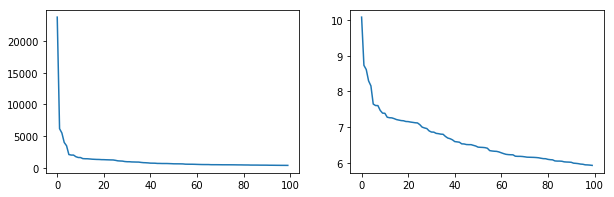

In [108]:
frequencies = [f for w,f in words_count.most_common(100)]
x = [i for i in range(100)]

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(x, frequencies)
plt.subplot(122)
plt.plot(x, np.log(frequencies))

In [117]:
#求单个词的概率
def prob_1(word):
    return words_count[word]/len(token_)

#两个词连在一起的模式,注意左闭右开
token_2_GRAM = [''.join(token_[i:i+2]) for i in range(len(token_[:-2]))]
#对两个词连在一起的情况进行统计
words_count_2 = Counter(token_2_GRAM)

#求两个词连在一起的概率
def prob_2(word1,word2):
    if word1 + word2 in words_count_2:
        return words_count_2[word1+word2]/len(token_2_GRAM)
    else:
        return 1/len(token_2_GRAM)

In [119]:
print('prob_1: ',prob_1('我们'))
print('prob_2: ',prob_2('我们', '的'))

prob_1:  0.002031735942430365
prob_2:  0.0002338209521733998


### 这样基于每个词的概率，我们就可以得出一个句子的概率

In [123]:
def get_prob(sentence):
    #首先把句子分词
    words = cut(sentence)
    #句子概率初始化
    sentence_prob = 1
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        #两个词连在一起的概率
        prob = prob_2(word,next_)
        #一个句子里每两个词连在一起的概率全部相乘，就是这个句子的概率
        sentence_prob *= prob
    return sentence_prob

In [131]:
get_prob('今天天气不错')

2.2701063317805805e-06

In [132]:
get_prob('昨晚睡得不好')

5.1533827575902836e-12

In [135]:
get_prob('我超级想喝一杯奶茶')

2.655735384622883e-23

In [137]:
for sen in [generate(gram=example_grammar,target='sentence') for i in range(10)]:
    print('sentence: {} \n with Prob: {}'.format(sen,get_prob(sen)))

sentence: 这个可爱的桌子看见这个女人 
 with Prob: 4.105806281951389e-34
sentence: 这个小猫看见一个小小的女人 
 with Prob: 6.028801712166142e-29
sentence: 这个桌子坐在这个蓝色的蓝色的蓝色的小小的小猫 
 with Prob: 8.251030647483681e-63
sentence: 这个小小的小小的小猫看见这个可爱的蓝色的小小的可爱的女人 
 with Prob: 1.53074588655929e-72
sentence: 一个可爱的篮球看见这个女人 
 with Prob: 8.211612563902777e-34
sentence: 这个可爱的小小的小小的小小的可爱的小小的蓝色的可爱的篮球坐在这个小小的小猫 
 with Prob: 6.097884023702148e-95
sentence: 一个小猫看着一个小小的蓝色的小小的女人 
 with Prob: 7.052930433138054e-46
sentence: 一个小猫看见一个篮球 
 with Prob: 2.655735384622883e-23
sentence: 这个小猫看着一个可爱的蓝色的篮球 
 with Prob: 4.231758259882832e-45
sentence: 这个女人看着一个蓝色的桌子 
 with Prob: 1.3686020939837966e-34


In [138]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1,s2 = s.split()
    p1,p2 = get_prob(s1),get_prob(s2)
    better = s1 if p1>p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 7.269290016923483e-57
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 7.269290016923483e-57
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.8086405136498427e-28
---- 真是一只好看的小猫 with probility 7.967206153868651e-23
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.4038472193713484e-16
---- 今晚火锅去吃我 with probility 5.311470769245767e-23
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.1698726828094571e-17
---- 养乐多绿来一杯 with probility 5.1533827575902836e-12
